<a href="https://colab.research.google.com/github/mshahbaba/lantern-examples/blob/master/10_introduction_to_artificial_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 10 – Introduction to Artificial Neural Networks**

_This notebook contains all the sample code and solutions to the exercises in chapter 10._

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [150]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Perceptrons

**Note**: we set `max_iter` and `tol` explicitly to avoid warnings about the fact that their default value will change in future versions of Scikit-Learn.

In [151]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, tol=-np.infty, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [152]:
y_pred

array([1])

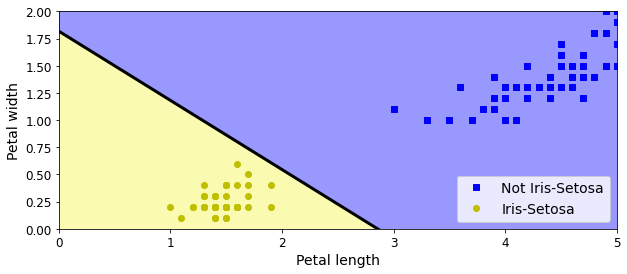

In [153]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

# save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [154]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

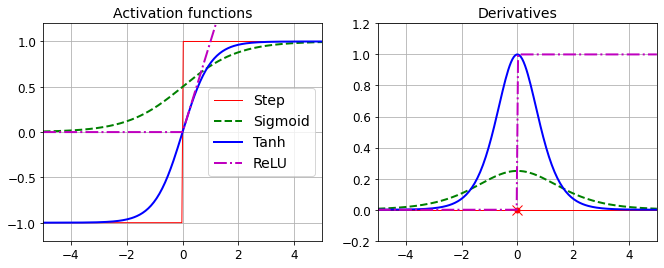

In [7]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

# save_fig("activation_functions_plot")
plt.show()

In [155]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

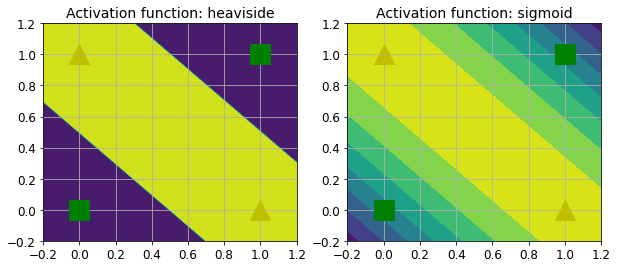

In [156]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# FNN for MNIST

## Using the Estimator API (formerly `tf.contrib.learn`)

In [157]:
import tensorflow as tf

**Warning**: `tf.examples.tutorials.mnist` is deprecated. We will use `tf.keras.datasets.mnist` instead. Moreover, the `tf.contrib.learn` API was promoted to `tf.estimators` and `tf.feature_columns`, and it has changed considerably. In particular, there is no `infer_real_valued_columns_from_input()` function or `SKCompat` class.

In [158]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [159]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                     feature_columns=feature_cols)
# input_fn = tf.estimator.inputs.numpy_input_fn(

input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpenmtsag8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.


In [160]:

# test_input_fn = tf.estimator.inputs.numpy_input_fn(
test_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(    
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-07-27T21:26:31Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpenmtsag8/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.44757s
INFO:tensorflow:Finished evaluation at 2020-07-27-21:26:32
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9487, average_loss = 0.1808018, global_step = 44000, loss = 0.17961186
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: /tmp/tmpenmtsag8/model.ckpt-44000


In [161]:
eval_results

{'accuracy': 0.9487,
 'average_loss': 0.1808018,
 'global_step': 44000,
 'loss': 0.17961186}

In [162]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpenmtsag8/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'all_class_ids': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32),
 'all_classes': array([b'0', b'1', b'2', b'3', b'4', b'5', b'6', b'7', b'8', b'9'],
       dtype=object),
 'class_ids': array([7]),
 'classes': array([b'7'], dtype=object),
 'logits': array([ 0.5357463 , -4.835307  ,  1.4066323 ,  3.000355  , -3.257499  ,
        -0.47835281, -6.6591535 ,  8.834581  , -1.4400225 ,  1.0406692 ],
       dtype=float32),
 'probabilities': array([2.4773815e-04, 1.1517916e-06, 5.9185288e-04, 2.9131216e-03,
        5.5796554e-06, 8.9861816e-05, 1.8590356e-07, 9.9570578e-01,
        3.4350043e-05, 4.1046683e-04], dtype=float32)}

In [19]:
dir(dnn_clf)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_actual_eval',
 '_actual_train_model_distributed',
 '_add_meta_graph_for_mode',
 '_assert_members_are_not_overridden',
 '_call_input_fn',
 '_call_model_fn',
 '_call_model_fn_eval',
 '_call_model_fn_eval_distributed',
 '_config',
 '_convert_eval_steps_to_hooks',
 '_convert_train_steps_to_hooks',
 '_create_and_assert_global_step',
 '_create_global_step',
 '_device_fn',
 '_estimator_api_names',
 '_estimator_api_names_v1',
 '_eval_distribution',
 '_evaluate_build_graph',
 '_evaluate_run',
 '_export_all_saved_models',
 '_extract_batch_length',
 '_extract_keys',
 '_get_features_and_labels_from_input_fn',
 '_get_features_from_i

## Using plain TensorFlow

In [163]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [164]:
# from tensorflow.python.framework import ops
# ops.reset_default_graph()

reset_graph()
tf.compat.v1.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [165]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [166]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [167]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [168]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [169]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [170]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [171]:
n_epochs = 40
batch_size = 50

In [172]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [173]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.88 Val accuracy: 0.9156
1 Batch accuracy: 0.92 Val accuracy: 0.9308
2 Batch accuracy: 0.96 Val accuracy: 0.9382
3 Batch accuracy: 0.92 Val accuracy: 0.9464
4 Batch accuracy: 0.96 Val accuracy: 0.951
5 Batch accuracy: 0.96 Val accuracy: 0.9538
6 Batch accuracy: 1.0 Val accuracy: 0.9592
7 Batch accuracy: 0.92 Val accuracy: 0.9616
8 Batch accuracy: 0.98 Val accuracy: 0.963
9 Batch accuracy: 0.94 Val accuracy: 0.9664
10 Batch accuracy: 0.96 Val accuracy: 0.9668
11 Batch accuracy: 0.96 Val accuracy: 0.9678
12 Batch accuracy: 0.98 Val accuracy: 0.9688
13 Batch accuracy: 0.96 Val accuracy: 0.9686
14 Batch accuracy: 1.0 Val accuracy: 0.971
15 Batch accuracy: 0.92 Val accuracy: 0.9712
16 Batch accuracy: 0.98 Val accuracy: 0.9714
17 Batch accuracy: 1.0 Val accuracy: 0.9728
18 Batch accuracy: 0.98 Val accuracy: 0.9736
19 Batch accuracy: 0.98 Val accuracy: 0.9734
20 Batch accuracy: 1.0 Val accuracy: 0.9758
21 Batch accuracy: 1.0 Val accuracy: 0.9728
22 Batch accuracy: 0.96 Val 

In [174]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [175]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", y_test[:20])

Predicted classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [176]:
# from tensorflow_graph_in_jupyter import show_graph

In [177]:
# show_graph(tf.get_default_graph())

## Using `dense()` instead of `neuron_layer()`

Note: previous releases of the book used `tensorflow.contrib.layers.fully_connected()` rather than `tf.layers.dense()` (which did not exist when this chapter was written). It is now preferable to use `tf.layers.dense()`, because anything in the contrib module may change or be deleted without notice. The `dense()` function is almost identical to the `fully_connected()` function, except for a few minor differences:
* several parameters are renamed: `scope` becomes `name`, `activation_fn` becomes `activation` (and similarly the `_fn` suffix is removed from other parameters such as `normalizer_fn`), `weights_initializer` becomes `kernel_initializer`, etc.
* the default `activation` is now `None` rather than `tf.nn.relu`.
* a few more differences are presented in chapter 11.

In [35]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [36]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

reset_graph()



X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

In [37]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [38]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [39]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [40]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [41]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [42]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Validation accuracy: 0.906
1 Batch accuracy: 0.92 Validation accuracy: 0.927
2 Batch accuracy: 0.94 Validation accuracy: 0.9348
3 Batch accuracy: 0.9 Validation accuracy: 0.9402
4 Batch accuracy: 0.94 Validation accuracy: 0.944
5 Batch accuracy: 0.94 Validation accuracy: 0.9482
6 Batch accuracy: 1.0 Validation accuracy: 0.9536
7 Batch accuracy: 0.94 Validation accuracy: 0.9584
8 Batch accuracy: 0.96 Validation accuracy: 0.9606
9 Batch accuracy: 0.9 Validation accuracy: 0.9616
10 Batch accuracy: 0.9 Validation accuracy: 0.963
11 Batch accuracy: 1.0 Validation accuracy: 0.9648
12 Batch accuracy: 0.98 Validation accuracy: 0.966
13 Batch accuracy: 0.98 Validation accuracy: 0.9666
14 Batch accuracy: 1.0 Validation accuracy: 0.9672
15 Batch accuracy: 0.92 Validation accuracy: 0.9692
16 Batch accuracy: 1.0 Validation accuracy: 0.9694
17 Batch accuracy: 1.0 Validation accuracy: 0.9702
18 Batch accuracy: 0.98 Validation accuracy: 0.9706
19 Batch accuracy: 0.96 Validation a

In [178]:
# show_graph(tf.get_default_graph())

# Exercise solutions

## 1. to 8.

See appendix A.

## 9.

_Train a deep MLP on the MNIST dataset and see if you can get over 98% precision. Just like in the last exercise of chapter 9, try adding all the bells and whistles (i.e., save checkpoints, restore the last checkpoint in case of an interruption, add summaries, plot learning curves using TensorBoard, and so on)._

First let's create the deep net. It's exactly the same as earlier, with just one addition: we add a `tf.summary.scalar()` to track the loss and the accuracy during training, so we can view nice learning curves using TensorBoard.

In [44]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [45]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

In [46]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [47]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    loss_summary = tf.summary.scalar('log_loss', loss)

In [48]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [49]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)

In [50]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

Now we need to define the directory to write the TensorBoard logs to:

In [51]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [52]:
logdir = log_dir("mnist_dnn")

Now we can create the `FileWriter` that we will use to write the TensorBoard logs:

In [53]:
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

Hey! Why don't we implement early stopping? For this, we are going to need to use the validation set.

In [54]:
m, n = X_train.shape

In [56]:
# n_epochs = 10001
n_epochs = 51


batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "/tmp/my_deep_mnist_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_deep_mnist_model"

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 50

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val, loss_val, accuracy_summary_str, loss_summary_str = sess.run([accuracy, loss, accuracy_summary, loss_summary], feed_dict={X: X_valid, y: y_valid})
        file_writer.add_summary(accuracy_summary_str, epoch)
        file_writer.add_summary(loss_summary_str, epoch)
        if epoch % 5 == 0:
            print("Epoch:", epoch,
                  "\tValidation accuracy: {:.3f}%".format(accuracy_val * 100),
                  "\tLoss: {:.5f}".format(loss_val))
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))
            if loss_val < best_loss:
                saver.save(sess, final_model_path)
                best_loss = loss_val
            else:
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print("Early stopping")
                    break

Training was interrupted. Continuing at epoch 41
INFO:tensorflow:Restoring parameters from /tmp/my_deep_mnist_model.ckpt
Epoch: 45 	Validation accuracy: 97.980% 	Loss: 0.06958
Epoch: 50 	Validation accuracy: 98.000% 	Loss: 0.06852


In [57]:
os.remove(checkpoint_epoch_path)

In [58]:
with tf.Session() as sess:
    saver.restore(sess, final_model_path)
    accuracy_val = accuracy.eval(feed_dict={X: X_test, y: y_test})

INFO:tensorflow:Restoring parameters from ./my_deep_mnist_model


In [59]:
accuracy_val

0.9791

# Using Keras

In [179]:
import tensorflow as tf

In [180]:
from tensorflow import keras

In [181]:
tf.__version__

'2.4.0-dev20200727'

In [182]:
tf.keras

<module 'tensorflow.keras' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/__init__.py'>

In [183]:
fashion_mnist = keras.datasets.fashion_mnist 

In [184]:
( X_train_full , y_train_full ), ( X_test , y_test ) = fashion_mnist.load_data() 

In [185]:
X_train_full.shape 

(60000, 28, 28)

In [186]:
X_train_full.dtype 


dtype('uint8')

# creating validation set and scaling features

In [187]:
X_valid , X_train = X_train_full [: 5000 ] / 255.0 , X_train_full [ 5000 :] / 255.0 

In [188]:
y_valid , y_train = y_train_full [: 5000 ], y_train_full [ 5000 :] 

In [189]:
X_test = X_test / 255.0 



In [190]:
class_names = [ "T-shirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag" , "Ankle boot" ] 



In [191]:
class_names[y_train[0]]

'Coat'

In [192]:
y_train[0]

4

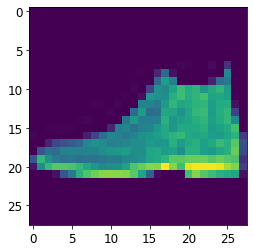

In [78]:
plt.imshow(X_test[0])

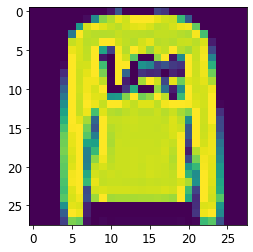

In [79]:
plt.imshow(X_test[1])

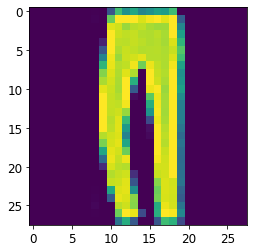

In [81]:
plt.imshow(X_test[2])

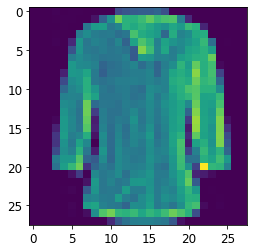

In [83]:
plt.imshow(X_test[4])

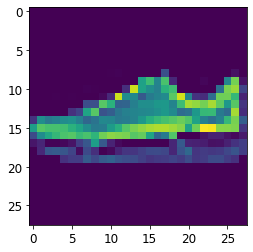

In [88]:
plt.imshow(X_test[9])

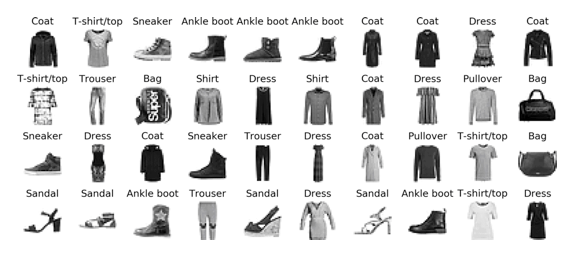

In [89]:
from IPython.display import Image
Image(filename='fashion.png') 

# using sequential API to make model

In [193]:
model = keras.models.Sequential()

In [194]:
# it takes care of all weights an bias vectors
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
# 10 neurons, i per class
# classes are exclusive multiclass, so we use softmax
model.add(keras.layers.Dense(10,activation="softmax"))

In [195]:
model.summary()
# none means the batch size can be anything
# first dense layer -> 300 * 784 weights + 300 biases = 235500 parameters -> might cause overfitting!

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [196]:
model.layers

In [197]:
model.layers[1].name

'dense'

In [198]:
model.get_layer('dense')

# accessing parameters

In [199]:
hidden1 = model.layers[1]

In [200]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.04806769, -0.00842804, -0.06072797, ...,  0.0110118 ,
         0.07077265,  0.05556244],
       [-0.05437128, -0.00246592, -0.00663116, ..., -0.05328875,
        -0.05587561, -0.0300585 ],
       [ 0.0019278 ,  0.01755136,  0.02663945, ...,  0.02558587,
        -0.03122272, -0.0348452 ],
       ...,
       [-0.00534165, -0.02474556, -0.01757433, ..., -0.02349716,
         0.0513605 , -0.00990166],
       [-0.05161033, -0.04549322, -0.00843646, ..., -0.07087924,
         0.05451736,  0.06491452],
       [-0.01293672,  0.06495634, -0.06535456, ...,  0.04698073,
         0.00587259,  0.00586812]], dtype=float32)

In [201]:
weights.shape

(784, 300)

In [202]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [203]:
biases.shape

(300,)

# how the values for bias and weight are initialized?

In [204]:
# randomly to break symmetry

# compiling the model

In [205]:
model.compile(
    # we have sparse categorical target: 0 to 9
    # if we had target generated by on-hot-encoder like '0 0 0 0 1 0 0 0 ' -> we needed to use categorical_crossentropy
    # for binary we should use "sigmoid" output activation instead of "softmax" and would use "binary_crossentropy"
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"])


# training

In [206]:
history=model.fit(X_train, y_train, epochs=30, validation_data=(X_valid,y_valid))


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 117us/sample - loss: 0.7287 - acc: 0.7575 - val_loss: 0.5154 - val_acc: 0.8258
Epoch 2/30
55000/55000 [==============================] - 6s 101us/sample - loss: 0.4867 - acc: 0.8295 - val_loss: 0.4628 - val_acc: 0.8356
Epoch 3/30
55000/55000 [==============================] - 6s 100us/sample - loss: 0.4432 - acc: 0.8428 - val_loss: 0.4103 - val_acc: 0.8596
Epoch 4/30
55000/55000 [==============================] - 6s 103us/sample - loss: 0.4146 - acc: 0.8540 - val_loss: 0.4161 - val_acc: 0.8568
Epoch 5/30
55000/55000 [==============================] - 6s 102us/sample - loss: 0.3955 - acc: 0.8608 - val_loss: 0.3839 - val_acc: 0.8670
Epoch 6/30
55000/55000 [==============================] - 5s 99us/sample - loss: 0.3792 - acc: 0.8649 - val_loss: 0.3994 - val_acc: 0.8570
Epoch 7/30
55000/55000 [==============================] - 6s 103us/sample - loss: 0.3662 - acc: 0.8697 - val_los

# learning curve

In [207]:
import pandas as pd 
import matplotlib.pyplot as plt 

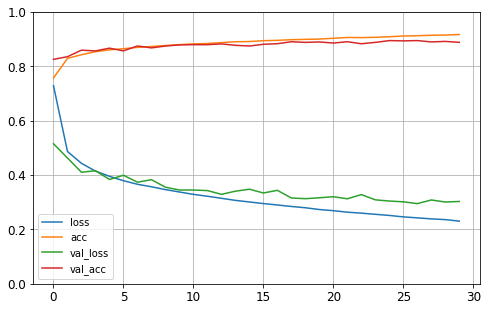

In [208]:
pd.DataFrame( history . history ).plot( figsize = ( 8 , 5 )) 
plt.grid( True ) 
plt.gca(). set_ylim ( 0 , 1 ) # set the vertical range to [0-1] 
plt.show() # treaining curves should be shifted by 0.5 epochs to the left

# you can continue training using fit(), it seems loss can be minimized more

# model evaluation

In [209]:
model.evaluate(X_test , y_test)


[0.3315998810529709, 0.8798]

# testing

In [210]:
X_new = X_test [: 3 ] 



In [211]:
y_proba = model.predict ( X_new ) 



In [212]:
y_proba.round( 2 ) 



array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [213]:
y_pred = model.predict_classes ( X_new ) 
y_pred 


array([9, 2, 1])

In [214]:
np.array( class_names )[ y_pred ] 

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

# MLP Regression

In [215]:
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

In [216]:
# getting a simplified version of the data

housing=fetch_california_housing()

X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target)

X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full)

scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [217]:
# building a single layer, no need to mention output activation
model = keras.models.Sequential([ 
		keras.layers.Dense(30 , activation = "relu", 
	input_shape = X_train.shape [ 1 :]), 
		keras.layers.Dense ( 1 )]) 

In [218]:
model.compile( loss = "mean_squared_error" , optimizer = "sgd" ) 


In [219]:
history = model.fit( X_train , y_train , epochs = 20 , validation_data = ( X_valid , y_valid )) 


Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.7719 - val_loss: 0.8874
Epoch 2/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.5073 - val_loss: 1.3154
Epoch 3/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4997 - val_loss: 6.2677
Epoch 4/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.6333 - val_loss: 7.5701
Epoch 5/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.5559 - val_loss: 0.4626
Epoch 6/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4081 - val_loss: 0.4337
Epoch 7/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.3939 - val_loss: 0.4017
Epoch 8/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.3868 - val_loss: 0.4005
Epoch 9/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3840 - val_l

In [220]:
mse_test = model.evaluate ( X_test , y_test ) 
mse_test

0.35889244539331094

In [221]:
X_new = X_test [: 3 ] # pretend these are new instances 

X_new

array([[ 0.88413518, -1.32156169,  0.85454471,  0.05914988,  1.43242249,
         0.18224059, -0.75887271,  0.95414751],
       [-1.39935976,  1.21997414, -1.16804582, -0.42632697,  0.16308654,
         0.27301608, -0.74478778,  0.67541033],
       [-0.01900876,  0.42574419, -0.1755988 ,  0.01747009, -0.2513905 ,
        -0.04333974, -0.81051745,  0.61070349]])

In [222]:

y_pred = model . predict ( X_new ) 
y_pred

array([[2.088925 ],
       [1.1554784],
       [2.428328 ]], dtype=float32)

# Building Complex Models Using the Functional API

# housing example

In [224]:
# just creating an input object
input_ = keras.layers.Input( shape = X_train.shape [ 1 :]) 



In [225]:
X_train.shape[ 1 :]

(8,)

In [226]:
# create a hidden layer and treat it as a function to pass input_ (Functional API)
hidden1 = keras.layers.Dense( 30 , activation = "relu" )( input_ ) 




In [227]:
hidden2 = keras.layers.Dense( 30 , activation = "relu" )( hidden1 ) 


In [228]:
# create a concatenation layer, use it as a function and pass inputs
concat = keras.layers.Concatenate ()([ input_ , hidden2 ]) 


In [229]:
# create output layer with one neuron, no activation
output = keras.layers.Dense ( 1 )( concat ) 


In [230]:
model = keras.Model( inputs = [ input_ ], outputs = [ output ]) 


In [231]:
# compile
model.compile( loss = "mse" , optimizer = keras . optimizers . SGD ( lr = 1e-3 )) 



In [232]:
# fit
history = model.fit( X_train , y_train , epochs = 20 , validation_data = ( X_valid , y_valid )) 


Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 43us/sample - loss: 1.3967 - val_loss: 2.6097
Epoch 2/20
11610/11610 [==============================] - 0s 34us/sample - loss: 0.6884 - val_loss: 1.6288
Epoch 3/20
11610/11610 [==============================] - 0s 34us/sample - loss: 0.6642 - val_loss: 1.5533
Epoch 4/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.5758 - val_loss: 1.0029
Epoch 5/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.5561 - val_loss: 1.1127
Epoch 6/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.5216 - val_loss: 0.7645
Epoch 7/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.5109 - val_loss: 1.6945
Epoch 8/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.5019 - val_loss: 0.8687
Epoch 9/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4969 - val_l

In [233]:
mse_test = model.evaluate ( X_test , y_test ) 
mse_test

0.4218231783818829

In [234]:
X_new = X_test [: 3 ] # pretend these are new instances 

X_new

array([[ 0.88413518, -1.32156169,  0.85454471,  0.05914988,  1.43242249,
         0.18224059, -0.75887271,  0.95414751],
       [-1.39935976,  1.21997414, -1.16804582, -0.42632697,  0.16308654,
         0.27301608, -0.74478778,  0.67541033],
       [-0.01900876,  0.42574419, -0.1755988 ,  0.01747009, -0.2513905 ,
        -0.04333974, -0.81051745,  0.61070349]])

In [235]:

y_pred = model . predict ( X_new ) 
y_pred

array([[2.1078959],
       [1.0113401],
       [2.4089303]], dtype=float32)